<a href="https://colab.research.google.com/github/piyushkchaudhari/CAPSTONE-PROJECT-UNSUPERVISED-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-/blob/main/CAPSTONE_PROJECT_CLASSIFICATION(Mobile_Price_Range_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOBILE PRICE RANGE PREDICTION**

## Project Type - Regression
## Contribution - Individual

# **Project Summary**

## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is

## **GitHub Link:**

## **Libraries**

In [ ]:
# IMPORTIGN LIBRARY
import numpy as np
import pandas as pd
from numpy import math
import calendar

# visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# null value visualization Library
import missingno as msno

# Model Testing Library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Variance Inflation Factor Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# file path of dataset
path='/content/drive/MyDrive/Almabetter/Machine Learning /data_mobile_price_range.csv'
df=pd.read_csv(path,encoding="ISO-8859-1")

## Dataset First View

In [ ]:
# top 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f" Number of rows in the dataset : {df.shape[0]} \n Number of columns in the dataset : {df.shape[1]}")

 Number of rows in the dataset : 2000 
 Number of columns in the dataset : 21


## Dataset Information

In [ ]:
# Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Basic stat description
df.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Missing Values/Null Values

In [ ]:
# Checking missing values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

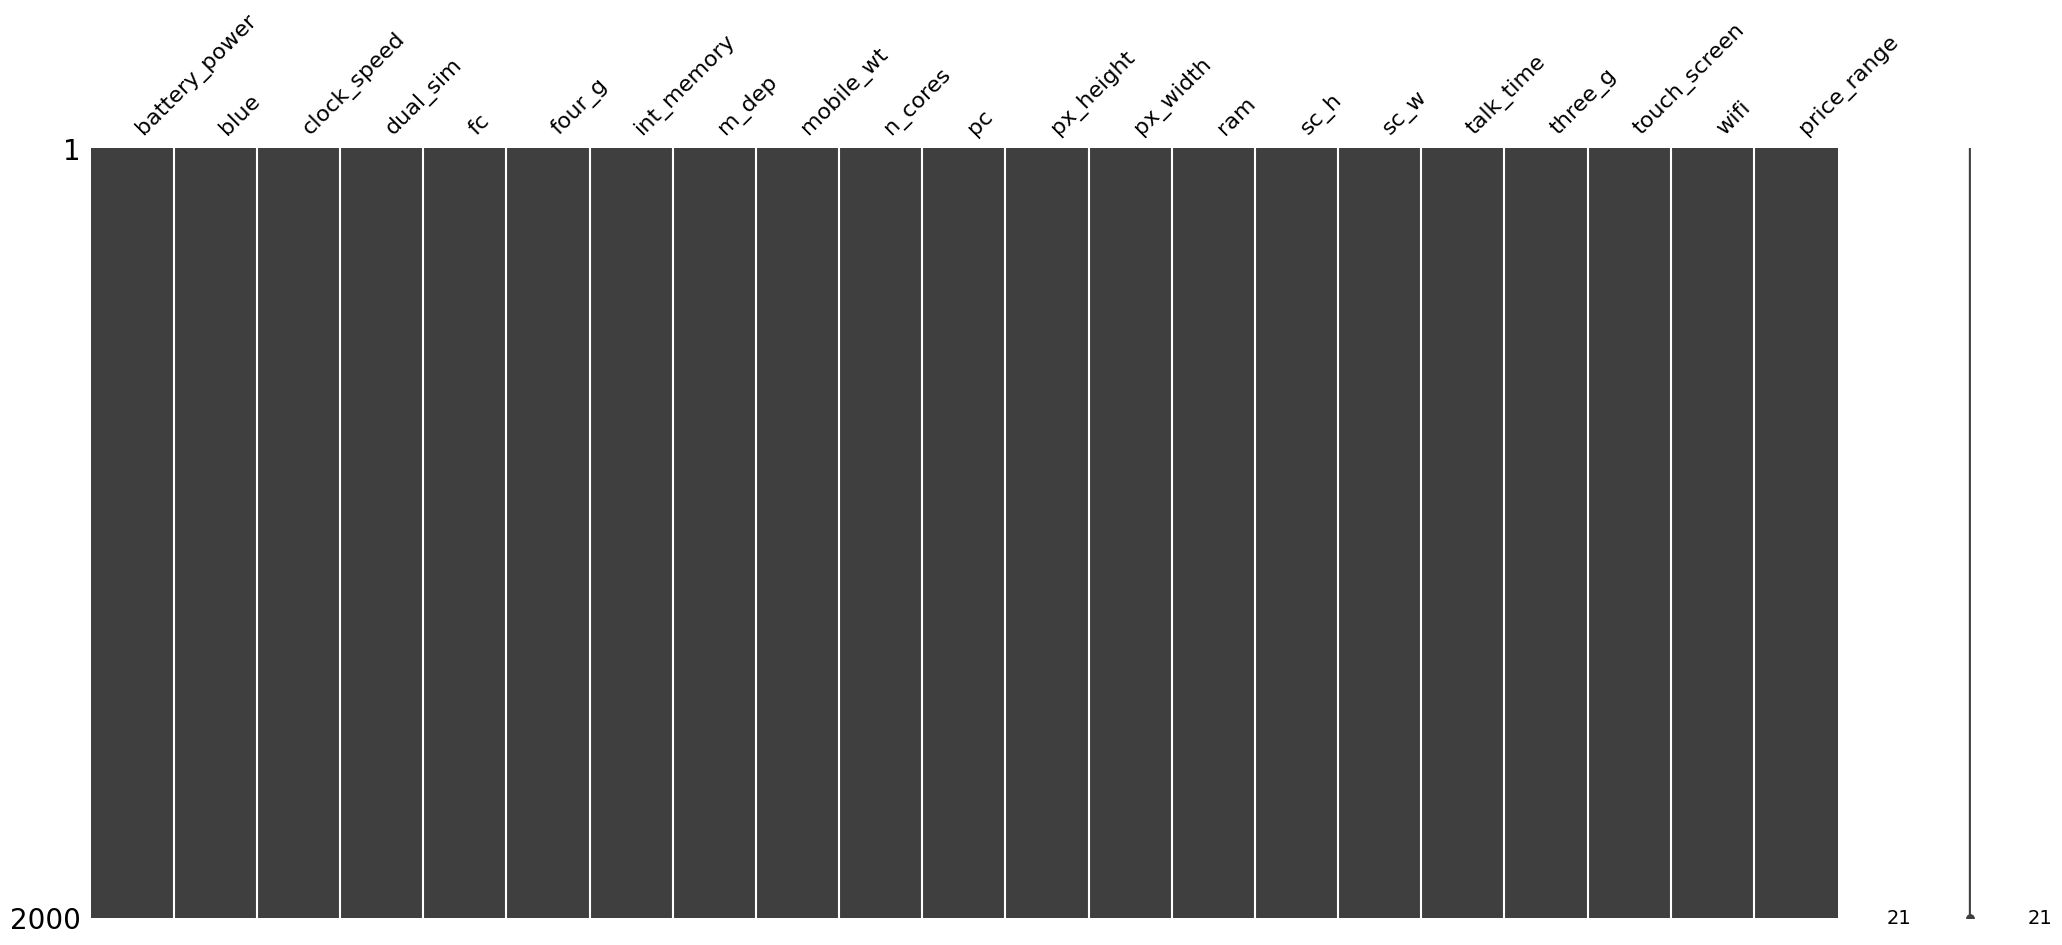

In [ ]:
# visualization missing values
msno.matrix(df)

In [ ]:
# Checking duplicat values
df.duplicated().sum()

0

## Check Unique Values for each variable.

In [ ]:
# Checking unique values
df.nunique(dropna = True).sort_values(ascending=False)

ram              1562
px_height        1137
px_width         1109
battery_power    1094
mobile_wt         121
int_memory         63
clock_speed        26
pc                 21
fc                 20
sc_w               19
talk_time          19
sc_h               15
m_dep              10
n_cores             8
price_range         4
blue                2
four_g              2
dual_sim            2
three_g             2
touch_screen        2
wifi                2
dtype: int64

## Attribute Information

### 1) Battery_power - Total energy a battery can store in one time measured in mAh
###2) Blue - Has bluetooth or not
###3) Clock_speed - speed at which microprocessor executes instructions
###4) Dual_sim - Has dual sim support or not
###5) Fc - Front Camera mega pixels
###6) Four_g - Has 4G or not
###7) Int_memory - Internal Memory in Gigabytes
###8) M_dep - Mobile Depth in cm
###9) Mobile_wt - Weight of mobile phone
###10) N_cores - Number of cores of processor
###11) Pc - Primary Camera mega pixels
###12) Px_height - Pixel Resolution Height
###13) Px_width - Pixel Resolution Width
###14) Ram - Random Access Memory in Mega
###15) Touch_screen - Has touch screen or not
###16) Wifi - Has wifi or not
###17) Sc_h - Screen Height of mobile in cm
###18) Sc_w - Screen Width of mobile in cm
###19) Talk_time - longest time that a single battery charge will last when you are
###20) Three_g - Has 3G or not
###21) Wifi - Has wifi or not
###22) Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

# **Exploratory Data Analysis**